# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.
Выполнил студент гр. 9381 Аухадиев Александр, вариант 2.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.

## Основные теоретические положения

Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:

$X' = A(t)X$, $A(t+T) = A(t)$, $t \geq 0$, где 

$X' = (x'_1,...,x'_n)^T$,

$X = (x_1,...,x_n)^T$,

$A(t) = ||a_{ij}(t)||$,

$a_{ij}(t+T) = a_{ij}(t)$

$T > 0$ - период коэффициентов системы

Фундаментальная матрица такой системы - матрица $\phi(t)$, у которой столбцы являются линейно независимыми решениями системы.

$\phi' = A(t)\phi$

Основная матрица для $\phi$ - матрица С такая, что

$\phi(t+T) = \phi(t)C, \forall t \geq 0$

Спектральный радиус матрицы С - число $r(C)$ такое, что

$r(C) = \underset{i} {max}|\lambda_i|$, где $i$ - собственные значения С.

## Постановка задачи

Дано дифференциальное уравнение: 

$x'' + a(p,t)x = 0$, $a(p,t) = p + b(t)$, $b(t+T) = b(t)$, где $p$ - параметр

Данное уравнение сводится к системе двух уравнений I-го порядка:

$\begin{equation*}
 \begin{cases}
   u'_1 = u_2,\\
   u'_2 = -a(p, t)u_1;
 \end{cases}
\end{equation*}$   (1)

Здесь $u_1(t) = x(t)$, $u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида (1).

## Выполнение работы

Вариант 2.

$b(t) = cos^2sint$

In [76]:
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
import math

T = math.pi

def b(t):
    return math.cos(math.sin(t)) ** 2

def a(p, t):
    return p + b(t)

Зададим массив значений параметра $p$: от 0.1 до 5 с шагом 0.05.

In [77]:
step = 0.05
p_array = np.arange(0.1, 5, step)

Вычислим значение фундаментальной матрицы системы (1) при t = T. Для этого решим две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Их решением являются вектор-функции $U(t, V_1)$ и $U(t, V_2)$. 

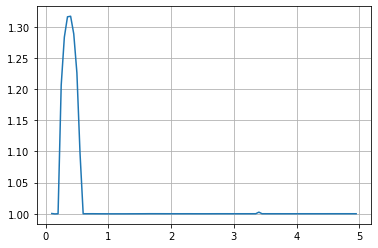

In [78]:
def F(t, u):  #Функция системы уравнений
    return [u[1], -a(p,t)*u[0]]

v1 = (1, 0)
v2 = (0, 1)
interval = (0, T)
spectral_ranges = []  #спектральные радиусы

for p in p_array:
    u1 = integ.solve_ivp(F, interval, v1)
    u2 = integ.solve_ivp(F, interval, v2)
    C = np.array([[u1.y[0][-1], u2.y[0][-1]], [u1.y[1][-1], u2.y[1][-1]]])  #Основная матрица С
    spectral_ranges.append(max(abs(np.linalg.eigvals(C))))                 
    
#График спектрального радиуса
plt.plot(p_array, spectral_ranges)
plt.grid(True)
plt.show()

Определим точку $p_0$, разделяющую зоны устойчивости и неустойчивости с точностью $\varepsilon = 10^{-3}$, $|r(p_0) - 1| < \varepsilon$

In [79]:
p0 = -1
rp0 = -1
epsilon = 0.001

for i in range(1, len(spectral_ranges)):
    if abs(spectral_ranges[-i] - 1) > epsilon:
        p0 = p_array[1 - i]
        rp0 = spectral_ranges[1 - i]
        break
        
print("p0 =", p0)
print("r(p0) =", rp0)

p0 = 3.450000000000001
r(p0) = 0.9998962564505647


Построим график спектрального радиуса основной матрицы при различных параметрах р с отмеченной на нём точкой $p_0$

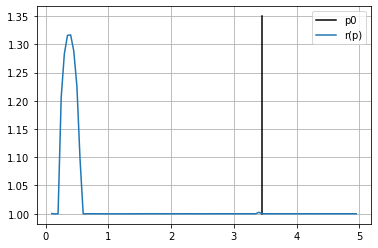

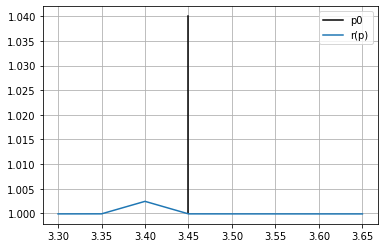

In [80]:
plt.plot([p0, p0], [1, 1.35], color="black", label="p0")
plt.plot(p_array, spectral_ranges, label="r(p)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot([p0, p0], [1, 1.04], color="black", label="p0")
plt.plot(p_array[int(3.2 / step): int(3.6 / step)], spectral_ranges[int(3.2 / step): int(3.6 / step)], label="r(p)")
plt.grid(True)
plt.legend()
plt.show()

Судя по графикам, граница между зонами устойчивости и неустойчивости $p_0 = 3.450000000000001$. При $p < p_0$ система неустойчива, при $p \geq p_0$ система устойчива.

## Выводы

В ходе данной практической работы была изучена устойчивость однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.